# Phishing Detection Training

- This notebook will implement and test multiple models for URL detection

First we import libraries and get data, we also display columns for choosing later on

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('data/data_featured.csv')
data.columns

Index(['Row', 'URL', 'Label', 'periods', 'slashes', 'length', 'numberCount',
       'firstdigit', 'IP', 'semicolon', 'domain', 'hash'],
      dtype='object')

# Train
Now we train a simple KNN classifier and get train, cross validation and test set accuracy

Training Model KNN
Model Trained KNN
Model Trained: Training Acc: 0.8186500070791448
Model Val: Val Acc: 0.8018112314553564
Model Test: Test Acc: 0.8023937380540639


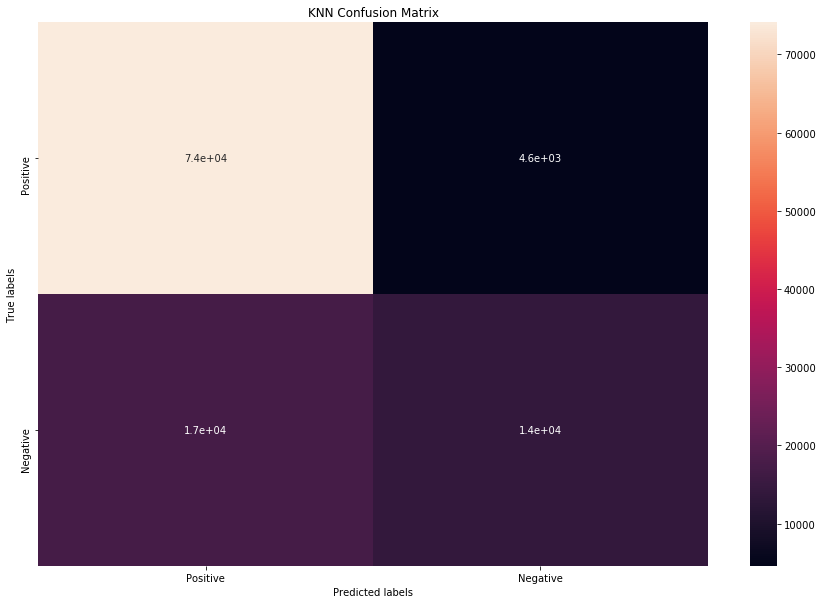

In [3]:
def confusion_matrix_plot(model, ax, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, model.predict(x_test))
    sns.heatmap(cm, annot=True); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(['Positive', 'Negative']); 
    ax.yaxis.set_ticklabels(['Positive', 'Negative']);

BEST_FEATURES = ['periods', 'length', 'slashes', 'numberCount', 'IP', 'hash']


data_y = data['Label']
data_x = data[BEST_FEATURES]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

# Split into training and cross validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1, random_state=1)
    
knn = KNeighborsClassifier(n_neighbors=2)

print('Training Model KNN')

knn.fit(x_train, y_train)
print("Model Trained KNN")

print('Model Trained: Training Acc: ' + str(accuracy_score(y_train, knn.predict(x_train))))
print('Model Val: Val Acc: ' + str(accuracy_score(y_val, knn.predict(x_val))))
print('Model Test: Test Acc: ' + str(accuracy_score(y_test, knn.predict(x_test))))

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
confusion_matrix_plot(knn, axes, title='KNN Confusion Matrix')